# The Cumulative Distribution Function

## Introduction

The PMF function that we saw before works great for inspecting discrete random variables and calculating their expected values. However, we did see that when moving towards continuous random variables, obtaining probabilities for observing a specific outcome is not possible (or, simply put, the probabilities were 0). We also noted that when working with PDFs, you can't really read the y-axis and have to be careful with interpretation. In this lesson, you'll learn about the cumulative distribution function (CDF) and how it is useful to overcome these issues.

## Objectives

You will be able to:

* Differentiate between a PMF, PDF, and a CDF in terms of cumulative probabilities 
* Calculate CDF in Python for a given discrete variable with limited set of possible values
* Visualize and inspect a given CDF in order to make assumptions about the underlying data 

## Limitations of PMFs and PDFs

To illustrate the use of Cumulative Distribution Functions, let's have another look at the PMF and PDF of our dice and temperature example:

<img src="../../images/dice_and_temp.png" width="900">


Recall how we could easily read probabilities from the dice PMF plot ("The probability of throwing a 4 is 16.66%"), but it is much harder to interpret the temperature PDF. What is the probability that the temperature is exactly 80 degrees? We learned in the previous lesson that all these so-called "point probabilities" are 0, so the bottom line is that it is very hard to "read" any interesting information from a PDF. The PDF is mainly there to get a sense of the data density, but you cannot readily read the y-axis to get to probabilities.

We did see last that when you want to calculate probabilities, you need to take integrals and look at ranges of values of your continuous random variables. For example, you can ask yourself the question: "What is the probability the temperature in NYC is between 82 and 85 degrees on June 1?" The answer is the surface of the red shaded area!

From the last lesson, you learned that you can use the integral to get this "area under the curve" value by taking the integral as follows:


<img src="../../images/section_temp.png" width="650">

$$\large P(82 \leq X \leq 85) = \int_{82}^{85} f_x(x) dx \geq 0 $$


This is the rationale that is being used when working with Cumulative Density Functions, which will be introduced next.

## How does a Cumulative Density Function (CDF) work?

The CDF is a function of $x$ just like a PMF or a PDF, where $x$ is any value that can possibly appear in a given distribution. To calculate the $CDF(x)$ for any value of $x$, we compute the proportion of values in the distribution less than or equal to $x$ as follows:

$$\large F(x) = P(X \leq x)$$

> The Cumulative Distribution Function, CDF, gives the probability that the variable $X$ is less than or equal to a certain possible value $x$. 

The cumulative distribution functions for a dice roll and the weather in NYC are plotted below.


<img src="../../images/cdfs_dice_nyc_2.png" width="950">

This is also what "cumulative" means - you're simply adding up probabilities.

You'll notice that in general, CDFs are smooth curves for continuous random variables, where they are "step functions" when looking at discrete random variables. Looking at these curves, we can answer questions by looking at the y-axis.

## Question
What is the probability that you throw a value $\leq$ 4 when throwing a dice? 0.6667 or 66.67. For this discrete example it is pretty straightforward, as this is the probability of throwing a 1 OR 2 OR 3 OR 4, so $0.1666 * 4$.

<!-- <img src="../../images/die.jpg" width="650">
 -->
![dice](https://media.giphy.com/media/f73urdknsWliIEZiDw/giphy.gif) 


## Question
What is the probability that the temperature in NYC is $\leq$ 79? Looking at the associated y-value when looking at an $x$-value of 79, this probability is around $40\%$ or $0.4$.

![NYC](https://media.giphy.com/media/3orieZMmRdBlKk5nY4/giphy.gif)

## Calculating more probabilities using the CDF

Let's go back to our weather example introduced before. An additional advantage of CDFs is that you can use them to easily calculate things like:

<img src="../../images/section_temp.png" width="650">

The idea is that
$$\large P(82 \leq X \leq 85) = P(X \leq 85) - P(X \leq 82)= F_X(85)- F_X(82)$$

This means that you can look at the y-value of your cumulative density function to get the answer to this question.

$$\large F_X(85)- F_X(82)	\approx 0.95-0.6 = 0.35$$

# CDF - Python Exercises

In the above, we learned how you can create a cumulative distribution function for discrete and continuous random variables. In this lab, you'll try to calculate a CDF for a dice roll yourself, and visualize it.

## Objectives
You will be able to:

* Calculate CDF in Python for a given discrete variable with a limited set of possible values
* Visualize and inspect a CDF in order to make assumptions about the underlying data

## Calculating CDF in Python 

Recall the formula to calculate the cumulative probability from the previous lesson:

$$\Large F(x)= P(X \leq x)$$

So given a list of all possible values of x, We can easily calculate the CDF for a given possible value $X$ by performing the following steps:

* Build a function `calculate_cdf(lst,X)`, where `lst` is a list of all possible values in a discrete variable $x$ (6 values for a dice roll), and $X$ is the value for which we want to calculate the cumulative distribution function 
* Initialize a variable called `count`
* For all values in `lst`, if a value is less than or equal to $X$, add one to `count` - do nothing otherwise. (this will tell us the total number of values less than $X$) 
* Calculate the cumulative probability of $X$ dividing `count` by the total number of possible values
* Round by 3 decimals and return the cumulative probability of $X$


In [5]:
def cdf(lst, x):
    count = 0
    for value in lst:
        if value <= x:
            if value <= x:
                count +=1
    cum_prob = count/len(lst)
    return round(cum_prob, 3)


In [6]:
test_1 = [1,2,3,4]
test_2 = 2

In [8]:
cdf(test_1, test_2)

0.5

# Now, use this function to calculate a CDF for each value in a dice roll so you can plot it later on.

Perform the following steps in the cell below:
* Create a list `dice_lst` with all possible values of a fair dice
* Initialize an empty list `dice_cum` for storing cumulative probabilities for these values.
* For each value in the `dice_lst` calculate its cumulative probability using the function above and store in `dice_cum` list. 

# Let's roll some dice
![dice](https://media.giphy.com/media/hShxTtT1SHXcfwMVEr/giphy.gif)

In [9]:
dice_lst = [1,2,3,4,5,6]  # note a dice has 6 numbers
dice_cum = []
for X in dice_lst:
    dice_cum.append(calculate_cdf(dice_lst, X))

dice_cum

[0.167, 0.333, 0.5, 0.667, 0.833, 1.0]

> CDFs are implemented with two sorted lists: one list which contains the potential outcome values of your discrete distribution, and another list which contains cumulative probabilities.

Following this, we now have a list of possible values and a second list containing cumulative probabilities for each value. Let's go ahead and plot these values in matplotlib using a bar plot. 
* Use `dice_lst` for x-axis and `dice_cum` for y-axis

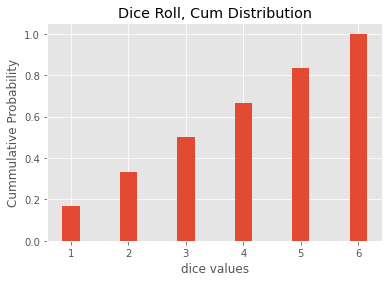

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')

plt.bar(dice_lst, dice_cum, width =0.3)
plt.title('Dice Roll, Cum Distribution')
plt.xlabel('dice values')
plt.ylabel('Cummulative Probability')
plt.show()

## Level Up (optional)

CDFs (and PMFs) can be calculated using built-in NumPy and matplotlib methods. So we don't have create custom functions to calculate these. We can draw a histogram styled CDF as shown below using the following steps

You would need to perform these steps
* Use `np.histogram()` to automatically calculate the histogram with probabilities. [Here is numpy histogram documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html) to help you dig deeper.

* Use [`plt.scatter()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) method with [`np.cumsum()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html) to calculate and plot cumulative probabilities (just like we did above). 


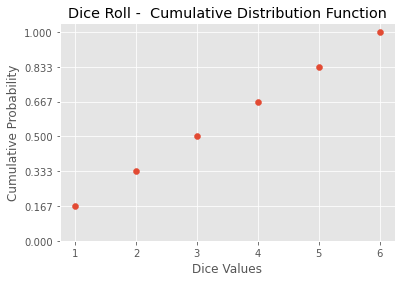

In [11]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

sample = [1,2,3,4,5,6]
hist = np.histogram(sample, bins=6, range=(1,7), normed=True)
plt.scatter(hist[1][:-1], np.cumsum(hist[0]))
plt.title ("Dice Roll -  Cumulative Distribution Function");
plt.xlabel("Dice Values")
plt.ylabel("Cumulative Probability")
plt.yticks(np.linspace(0,1,num=7))
plt.show()

In [12]:
import scipy.stats as stats

In [16]:
mu = 100
sigma = 2
size = 1000000 

In [17]:
pop = np.random.normal(loc=mu , scale=sigma , size=size)

In [14]:
x = np.linspace(90, 110 , 1000)
y = stats.norm.cdf(x , loc=mu , scale = sigma)

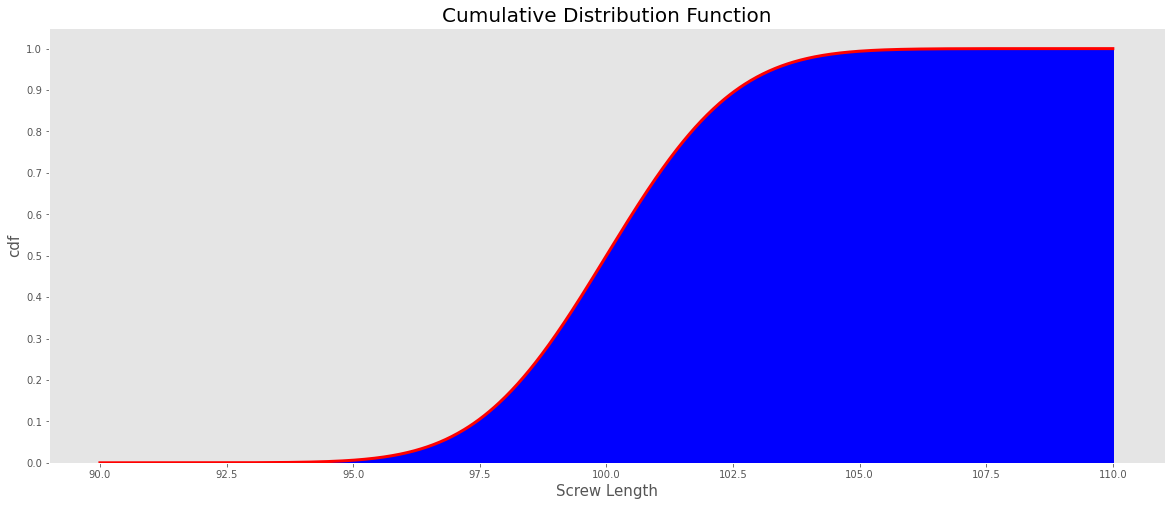

In [20]:
plt.figure(figsize = (20, 8))
plt.hist(pop, bins = 1000, color = "blue" ,density= True, cumulative= True)
plt.plot(x, y, color = "red", linewidth = 3)
plt.grid()
plt.title("Cumulative Distribution Function", fontsize = 20)
plt.xlabel("Screw Length", fontsize = 15)
plt.ylabel("cdf", fontsize = 15)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

## Summary 

+ In this lesson, we looked at a CDF as a so-called "percentile probability function" of discrete or continuous random variables. You learned how to calculate and visualize a CDF and how to use them to calculate certain probabilities.

+ We looked at developing a CDF - a percentile function of a discrete random variable. We looked at how to calculate and visualize a CDF. This technique can also be applied to continuous random variables which we shall see later in this section. 